<h1>SQLite Database Creator</h1>
<p>This notebook aggreates a range of data collected for the take-a-seat project and converts it into an SQLite database based on the following schema: <img src="schema.png" alt="Schema for Database"></p>
<p>The data is converted into csvs, then added into the SQLite .db</p>

In [15]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt, timedelta
from dateutil.relativedelta import *
import re
from matplotlib import pyplot as plt
import sqlite3

<h3>SQLite Handling functions</h3>
<p>Use Pandas to import dataframe into SQLlite</p>

In [16]:
DB = "hockey_data.db"

#SQL Handle functions
def run_query(q):
    with sqlite3.connect(DB) as conn:
        x = pd.read_sql(q,conn)
    return x
   
#send command
def run_command(c):
    with sqlite3.connect(DB) as conn:
        conn.isolation_level = None
        return conn.execute(c)
    
#show tables
def show_tables():
    r = """
    Select name,type
    FROM sqlite_master
    WHERE type in ("table","view");
        """
    return run_query(r)

<h2>Import and Clean up csvs</h2>
    <p><ul>
        <li><b>team_list</b>: This csv gets piped straight into its own table</li>
        <li><b>player_list</b>: Only count those players who have played more than 113 games (median no)</li>
</ul><p>

In [36]:
#import team list data
teams = pd.read_csv('team_list.csv',encoding = "ISO-8859-1")
teams['longitude'] = teams['longitude'].astype(float)
teams.drop(columns=['index'],inplace=True)
teams = teams.set_index('team_abbr')
teams.head()

,team_name,years_active,city,latitude,longitude,timezone
team_abbr,,,,,,
ANA,Anaheim Ducks,2006-2020,Anaheim,33.808,-117.876,-8
MDA,Mighty Ducks of Anaheim,1993-2006,Anaheim,33.808,-117.876,-8
ARI,Arizona Coyotes,2014-2020,Glendale,33.532,-112.261,-7
PHX,Phoenix Coyotes,1996-2014,Glendale,33.532,-112.261,-7
WIN,Winnipeg Jets,1990-1996,Winnipeg,49.893,-97.144,-6


In [27]:
#import player list data
players = pd.read_csv('nhlplayerlistr3.txt','\t')
players.drop(columns=['Unnamed: 0','link','height','weight'],inplace=True)
players = players.set_index('unique_id')
#sort based ons whether or not there is injury data
players.head()

,player,year_start,year_finish,position,injuries_found,height_cm,weight_kg,total_games
unique_id,,,,,,,,
aaltoan01,Antti Aalto,1998,2001,F,0.0,185.0,95.0,151.0
abbotsp01,Spencer Abbott,2014,2017,F,0.0,175.0,77.0,2.0
abdelju01,Justin Abdelkader,2008,2020,F,32.0,188.0,96.0,739.0
abergpo01,Pontus Aberg,2017,2020,F,6.0,180.0,88.0,132.0
abidra01,Ramzi Abid,2003,2007,F,3.0,188.0,95.0,68.0


Text(0.5, 1.0, '')

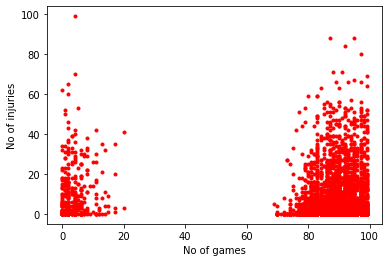

In [54]:
plt.plot(players['weight_kg'],players['injuries_found'],'r.')
plt.xlabel('No of games')
plt.ylabel('No of injuries')
plt.title('')

In [35]:
players.describe()

,year_start,year_finish,injuries_found,height_cm,weight_kg,total_games
count,4675.000000,4675.000000,4675.000000,4669.000000,4669.000000,4675.000000
mean,2002.775829,2008.680214,6.683422,185.235382,81.762690,257.860107
std,10.960944,9.507479,11.476674,5.297255,23.969145,313.641730
min,1972.000000,1990.000000,0.000000,163.000000,0.000000,0.000000
25%,1994.000000,2001.000000,0.000000,183.000000,83.000000,17.000000
50%,2003.000000,2010.000000,1.000000,185.000000,88.000000,113.000000
75%,2012.000000,2018.000000,8.000000,188.000000,92.000000,415.500000
max,2020.000000,2020.000000,99.000000,206.000000,99.000000,1733.000000


<h2>Wipe Database first</h2>
<p>Since we're building the db from scratch here</p>

In [50]:
tables = show_tables() #gets the tables in the db
with sqlite3.connect(DB) as conn:
    for row,data in tables.iterrows():
        run_command("DROP TABLE IF EXISTS {}".format(tables.loc[row,'name'])) #clear DB of existing tables

<h3>Enter Team Data</h3>

In [51]:
#make a new table with the appropriate keys
c1 = """
    CREATE TABLE IF NOT EXISTS team_list (
    team_abbr TEXT PRIMARY KEY,
    team_name TEXT,
    years_active TEXT,
    city TEXT,
    latitude REAL,
    longitude REAL,
    timezone INTEGER
);
"""
run_command(c1)

#inject data into the table
teams.to_sql('team_list',con=sqlite3.connect(DB), if_exists='append')

<h3>Enter Player Data</h3>

In [ ]:
#make a new table with the appropriate keys
c1 = """
    CREATE TABLE IF NOT EXISTS player_list (
    unique_id TEXT PRIMARY KEY,
    player TEXT,
    year_start INTEGER,
    year_finish INTEGER,
    position TEXT,
    height_cm INTEGER,
    weight_cm INTEGER
);
"""

run_command(c1)

#inject data into the table
players[[]].to_sql('player_list',con=sqlite3.connect(DB), if_exists='append')

In [ ]:
run_command("DROP TABLE teams")
run_command("DROP TABLE team_list")

In [ ]:
show_tables()

In [ ]:
run_query("SELECT * FROM team_list")

In [ ]:
<p>.  Create a new </p>

#clear DB of existing tables
run_command("DROP TABLE IF EXISTS {}".format(name)) 